<a href="https://colab.research.google.com/github/fjadidi2001/DataScienceJourney/blob/master/telematics_syn_V9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# Mount Google Drive
from google.colab import drive

drive.mount('/content/drive')

# Specify file path

file_path = '/content/drive/My Drive/telematics_syn.csv'

# Import pandas (assuming you want to use it to read the CSV)
import pandas as pd

# Read the CSV file
df = pd.read_csv(file_path)
print(df.shape)  # Should print (100000, 52)
print(df.head()) # To check the first few rows

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(100000, 52)
   Duration  Insured.age Insured.sex  Car.age  Marital  Car.use  Credit.score Region  Annual.miles.drive  Years.noclaims  Territory  Annual.pct.driven  Total.miles.driven  Pct.drive.mon  Pct.drive.tue  Pct.drive.wed  Pct.drive.thr  Pct.drive.fri  Pct.drive.sat  Pct.drive.sun  Pct.drive.2hrs  Pct.drive.3hrs  Pct.drive.4hrs  Pct.drive.wkday  Pct.drive.wkend  Pct.drive.rush am  Pct.drive.rush pm  Avgdays.week  Accel.06miles  Accel.08miles  Accel.09miles  Accel.11miles  Accel.12miles  Accel.14miles  Brake.06miles  Brake.08miles  Brake.09miles  Brake.11miles  Brake.12miles  Brake.14miles  Left.turn.intensity08  Left.turn.intensity09  Left.turn.intensity10  Left.turn.intensity11  Left.turn.intensity12  Right.turn.intensity08  Right.turn.intensity09  Right.turn.intensity10  Right.turn.intensity11  Right.turn.intensity12  NB_Claim    AMT_Claim
0       36

In [29]:
# Adjust display options to show all columns
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent line wrapping

# Display the first few rows of the dataframe
print(df.head())

   Duration  Insured.age Insured.sex  Car.age  Marital  Car.use  Credit.score Region  Annual.miles.drive  Years.noclaims  Territory  Annual.pct.driven  Total.miles.driven  Pct.drive.mon  Pct.drive.tue  Pct.drive.wed  Pct.drive.thr  Pct.drive.fri  Pct.drive.sat  Pct.drive.sun  Pct.drive.2hrs  Pct.drive.3hrs  Pct.drive.4hrs  Pct.drive.wkday  Pct.drive.wkend  Pct.drive.rush am  Pct.drive.rush pm  Avgdays.week  Accel.06miles  Accel.08miles  Accel.09miles  Accel.11miles  Accel.12miles  Accel.14miles  Brake.06miles  Brake.08miles  Brake.09miles  Brake.11miles  Brake.12miles  Brake.14miles  Left.turn.intensity08  Left.turn.intensity09  Left.turn.intensity10  Left.turn.intensity11  Left.turn.intensity12  Right.turn.intensity08  Right.turn.intensity09  Right.turn.intensity10  Right.turn.intensity11  Right.turn.intensity12  NB_Claim    AMT_Claim
0       366           45        Male       -1  Married  Commute         609.0  Urban             6213.71              25         70           0.849315  

In [30]:
# Exploratory Data Analysis (EDA)
print("Summary statistics:\n", df.describe())

Summary statistics:
             Duration    Insured.age        Car.age   Credit.score  Annual.miles.drive  Years.noclaims      Territory  Annual.pct.driven  Total.miles.driven  Pct.drive.mon  Pct.drive.tue  Pct.drive.wed  Pct.drive.thr  Pct.drive.fri  Pct.drive.sat  Pct.drive.sun  Pct.drive.2hrs  Pct.drive.3hrs  Pct.drive.4hrs  Pct.drive.wkday  Pct.drive.wkend  Pct.drive.rush am  Pct.drive.rush pm   Avgdays.week  Accel.06miles  Accel.08miles  Accel.09miles  Accel.11miles  Accel.12miles  Accel.14miles  Brake.06miles  Brake.08miles  Brake.09miles  Brake.11miles  Brake.12miles  Brake.14miles  Left.turn.intensity08  Left.turn.intensity09  Left.turn.intensity10  Left.turn.intensity11  Left.turn.intensity12  Right.turn.intensity08  Right.turn.intensity09  Right.turn.intensity10  Right.turn.intensity11  Right.turn.intensity12      NB_Claim      AMT_Claim
count  100000.000000  100000.000000  100000.000000  100000.000000       100000.000000   100000.000000  100000.000000      100000.000000    

In [31]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Duration                  0
Insured.age               0
Insured.sex               0
Car.age                   0
Marital                   0
Car.use                   0
Credit.score              0
Region                    0
Annual.miles.drive        0
Years.noclaims            0
Territory                 0
Annual.pct.driven         0
Total.miles.driven        0
Pct.drive.mon             0
Pct.drive.tue             0
Pct.drive.wed             0
Pct.drive.thr             0
Pct.drive.fri             0
Pct.drive.sat             0
Pct.drive.sun             0
Pct.drive.2hrs            0
Pct.drive.3hrs            0
Pct.drive.4hrs            0
Pct.drive.wkday           0
Pct.drive.wkend           0
Pct.drive.rush am         0
Pct.drive.rush pm         0
Avgdays.week              0
Accel.06miles             0
Accel.08miles             0
Accel.09miles             0
Accel.11miles             0
Accel.12miles             0
Accel.14miles             0
Brake.06miles             0
Bra

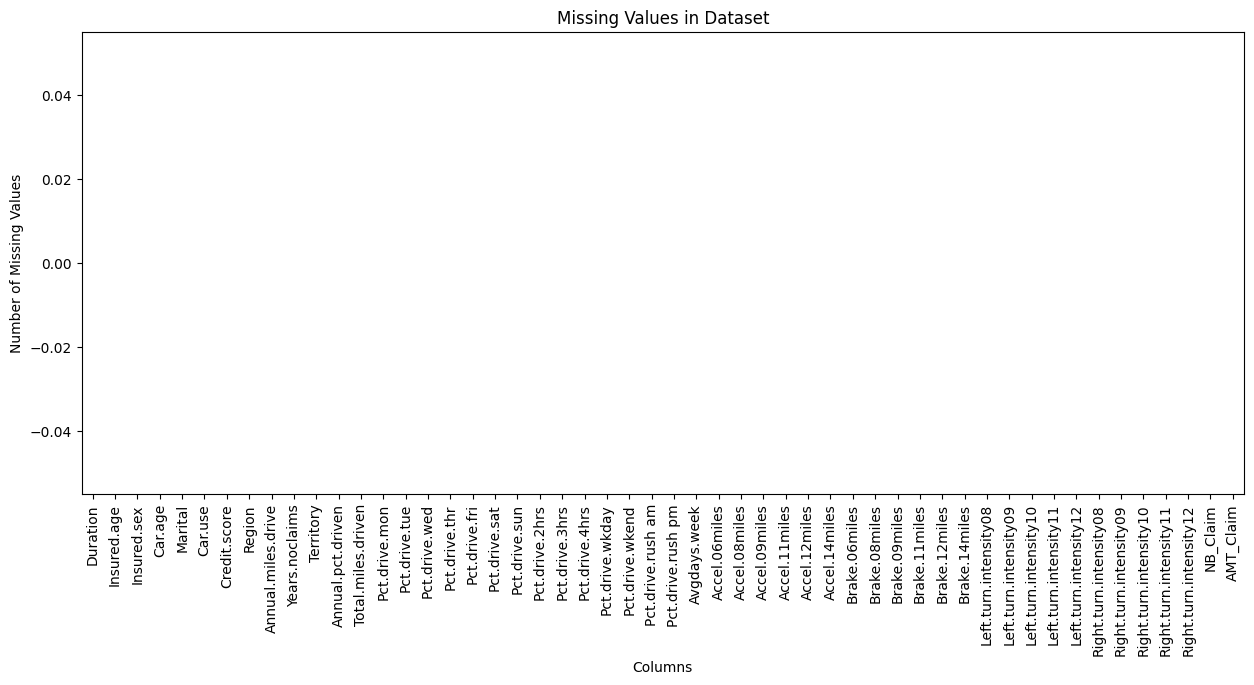

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame
missing_values = df.isnull().sum()

# Plotting the missing values
missing_values.plot(kind='bar', figsize=(15, 6))
plt.title('Missing Values in Dataset')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

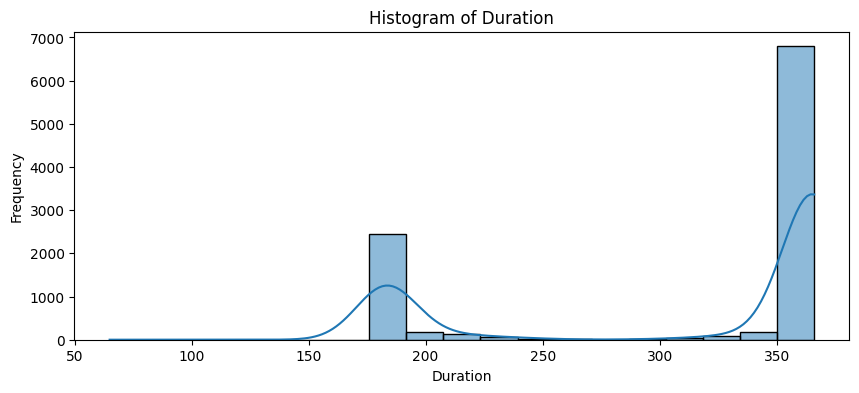

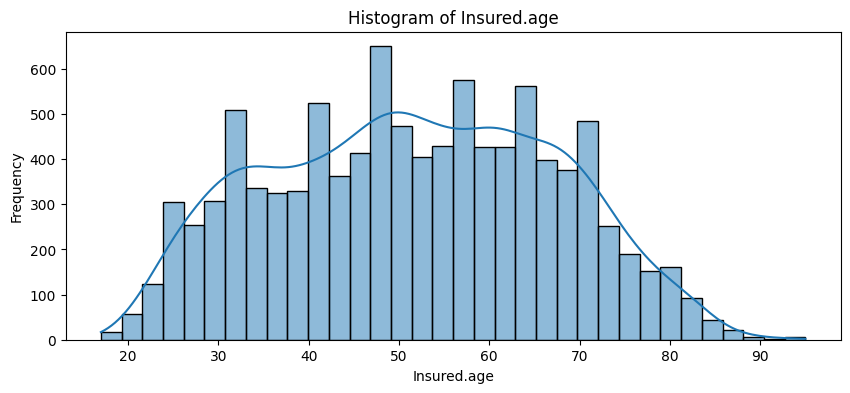

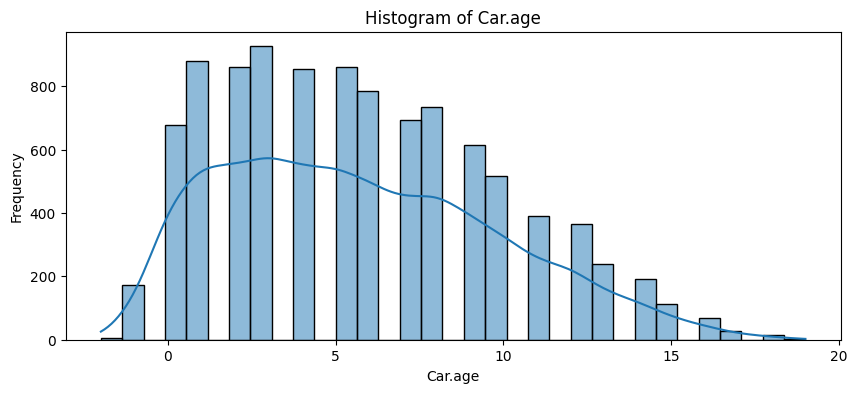

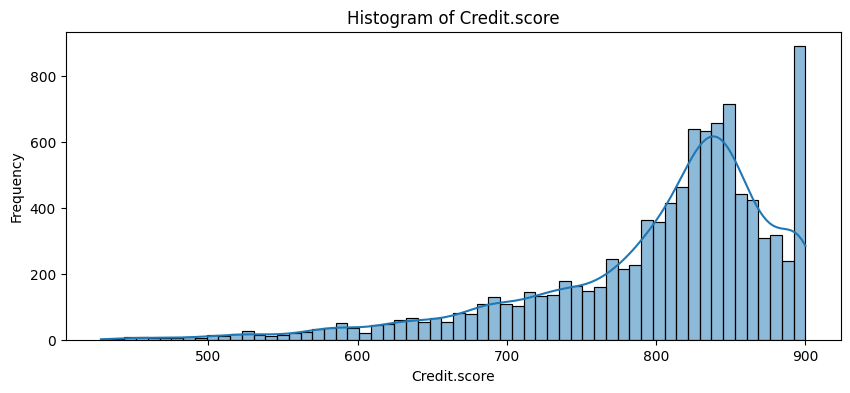

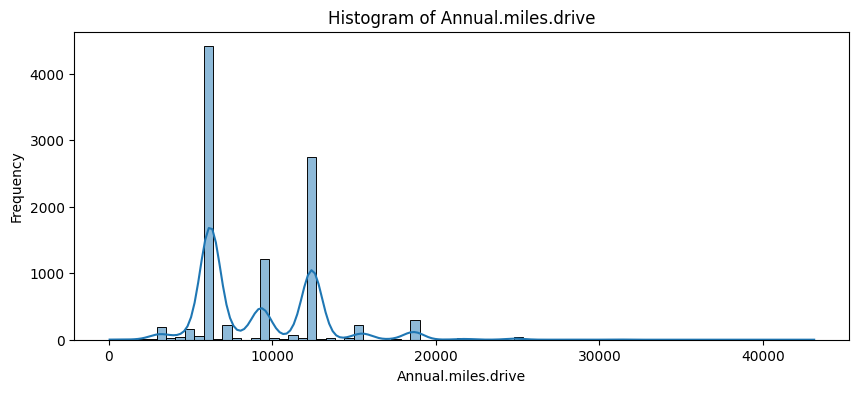

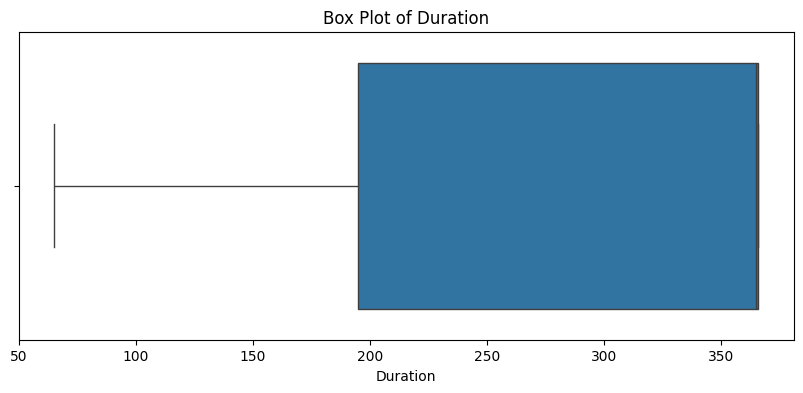

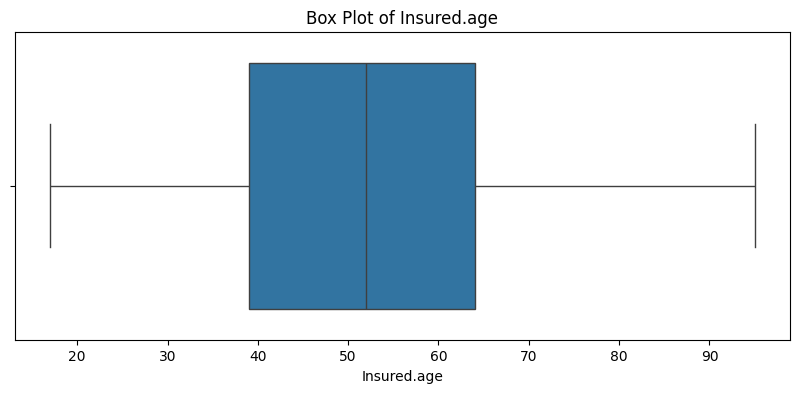

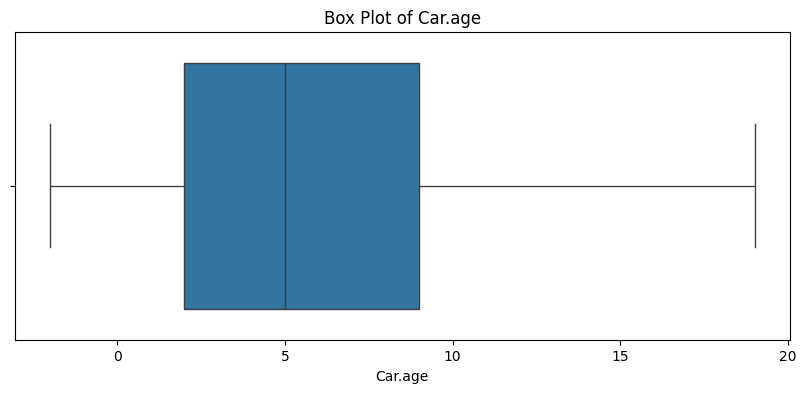

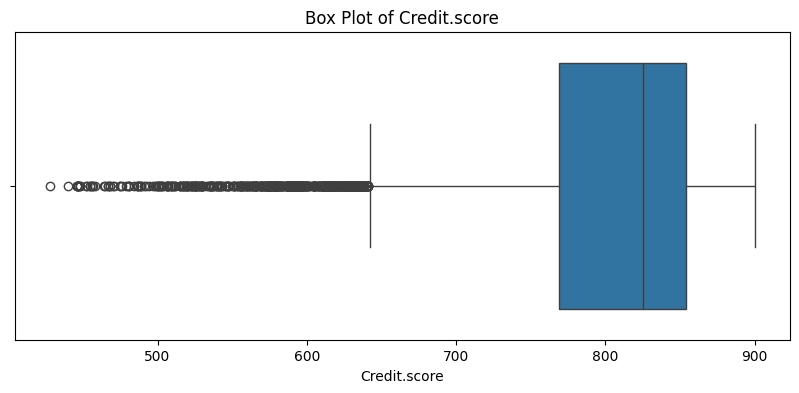

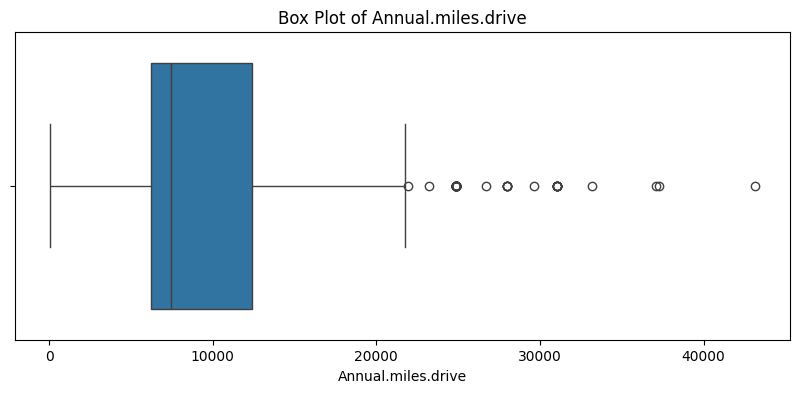

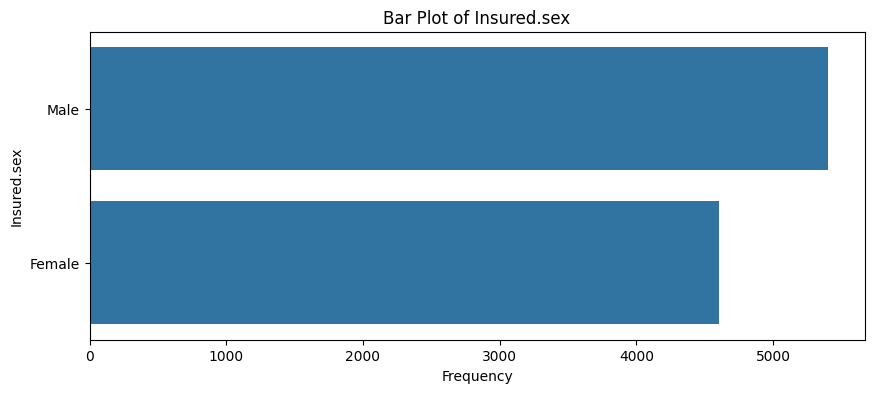

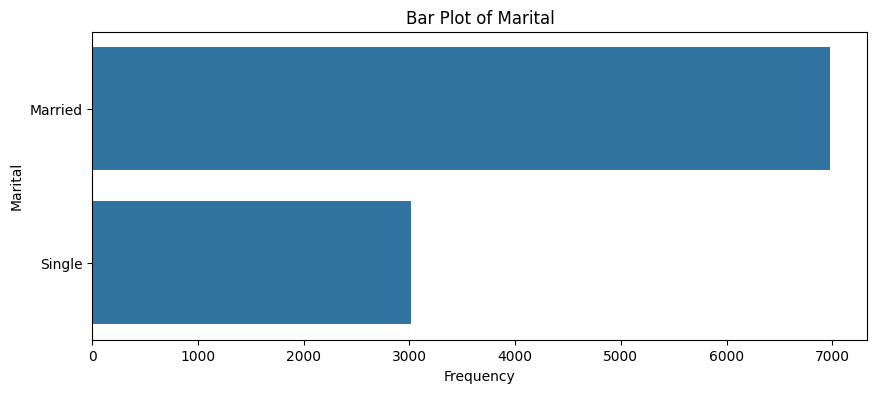

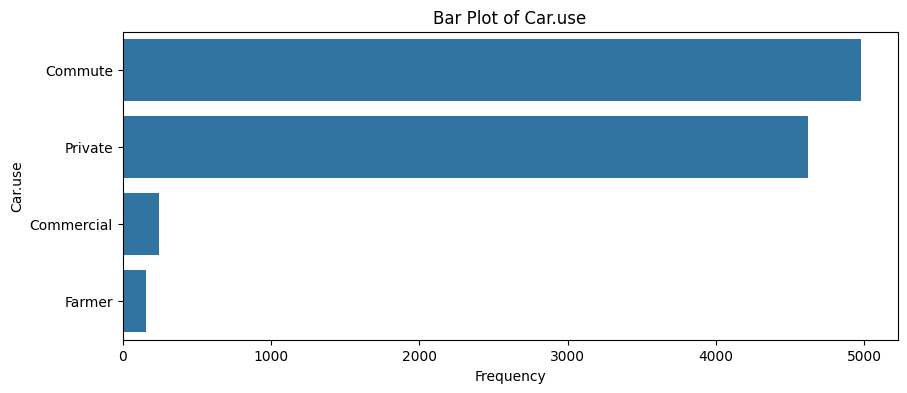

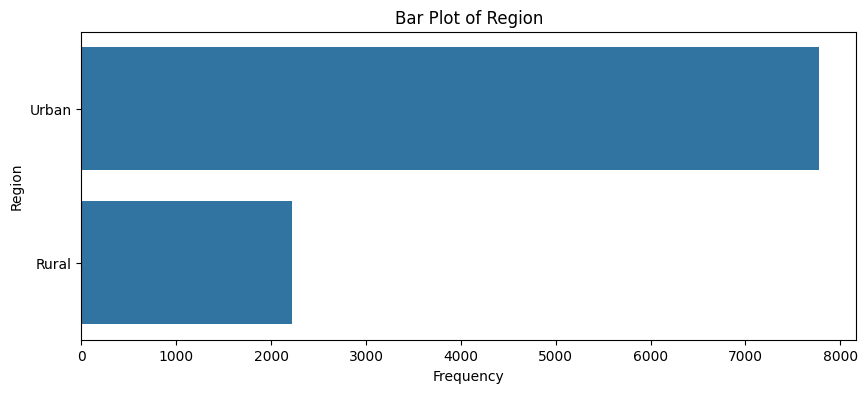

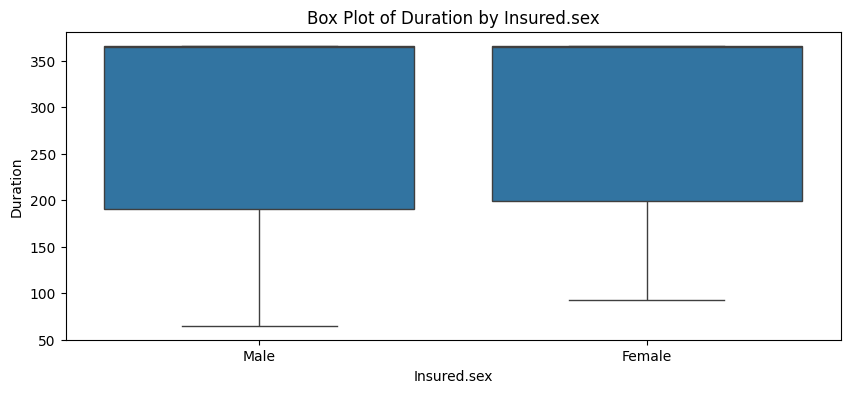

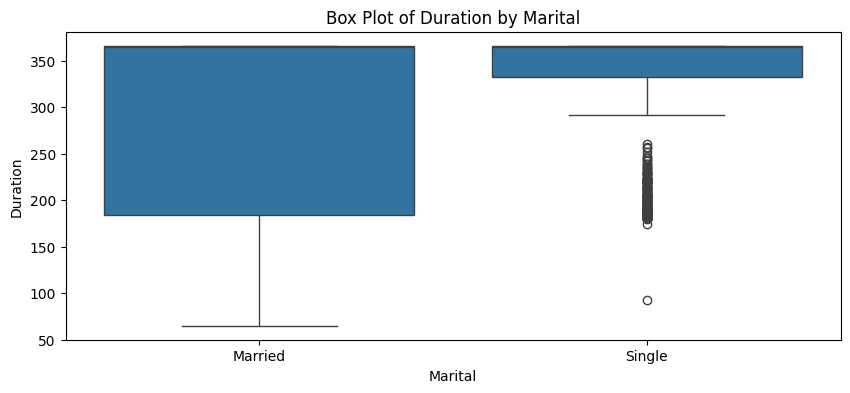

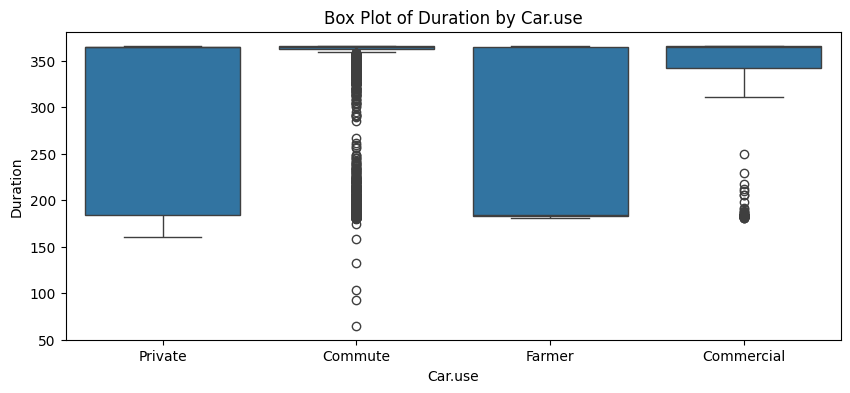

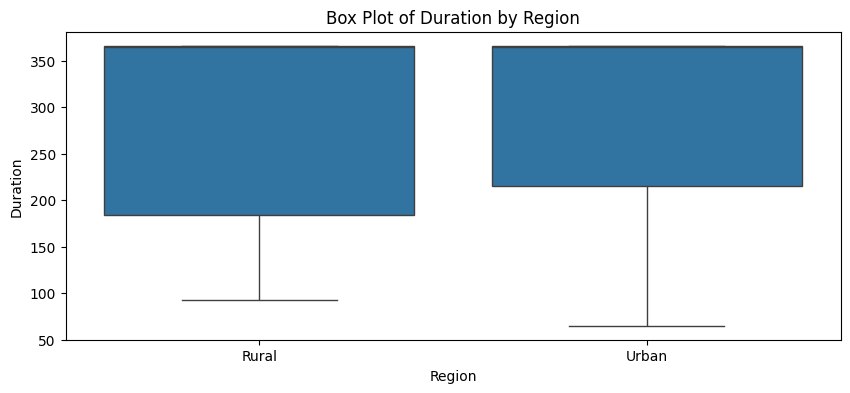

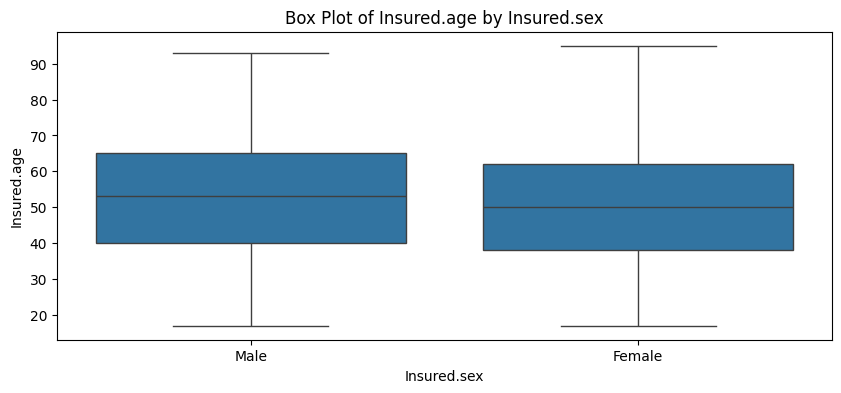

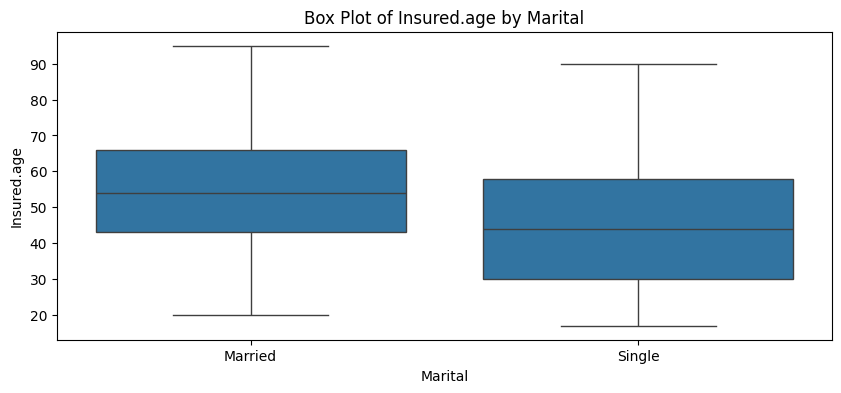

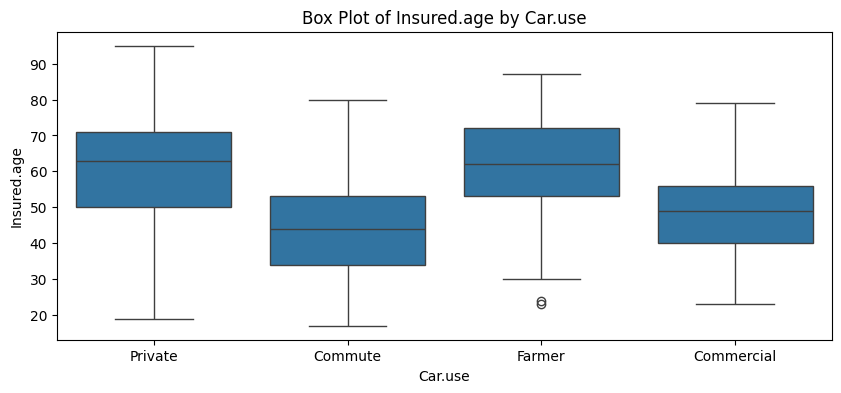

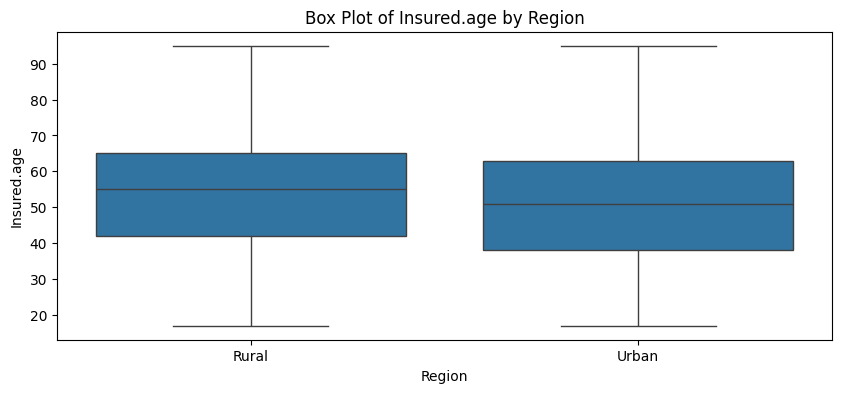

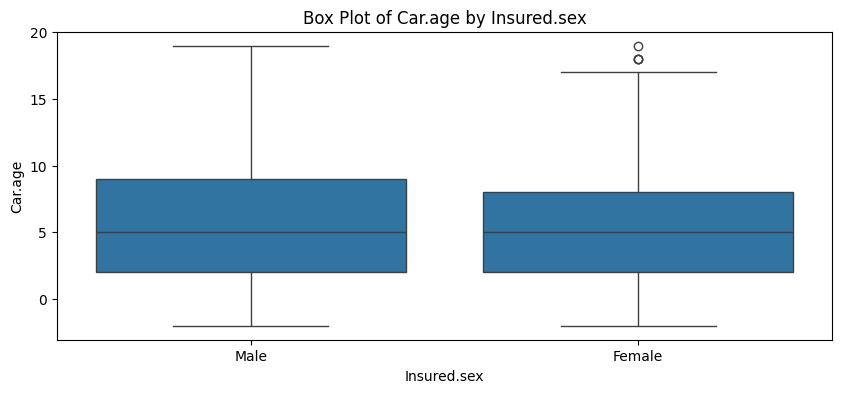

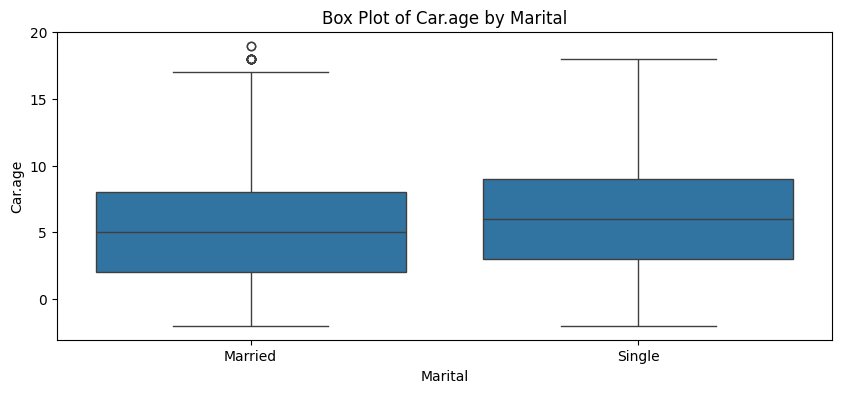

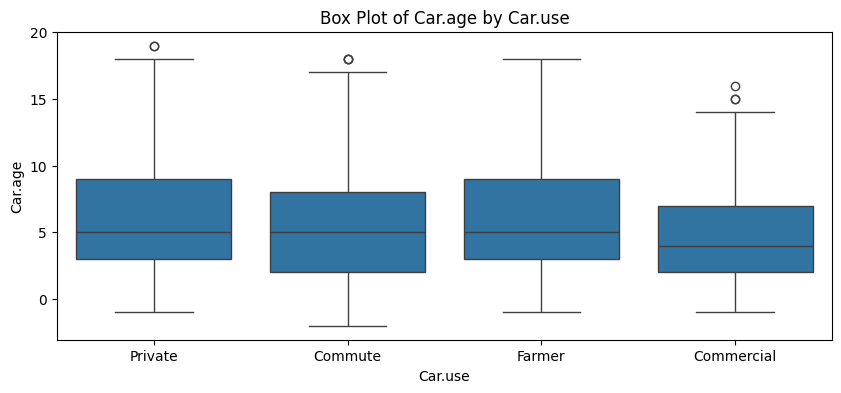

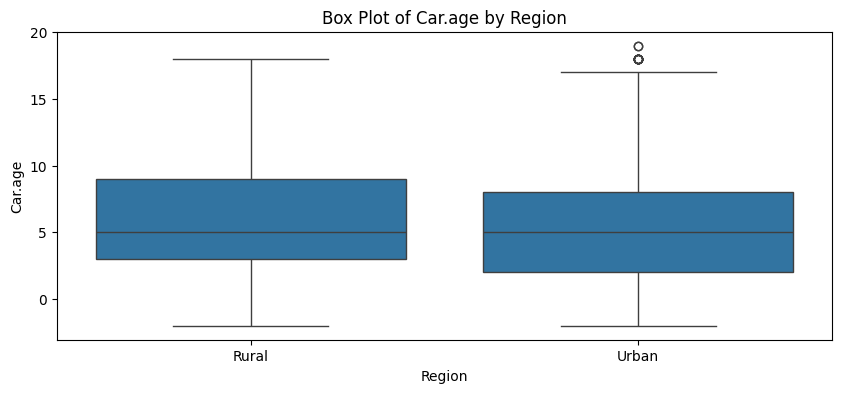

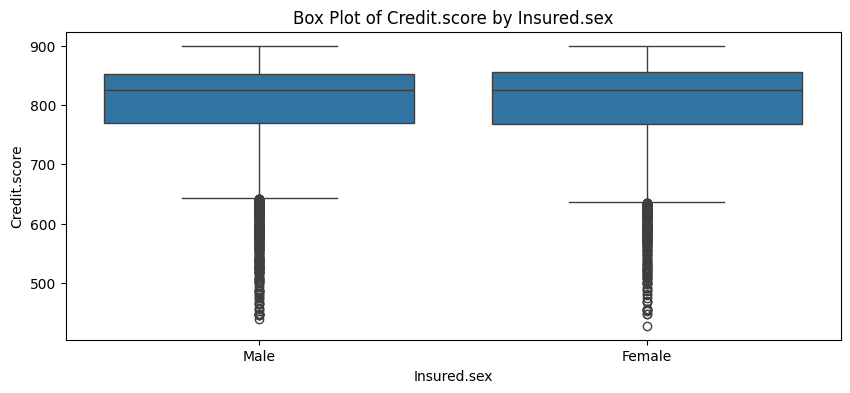

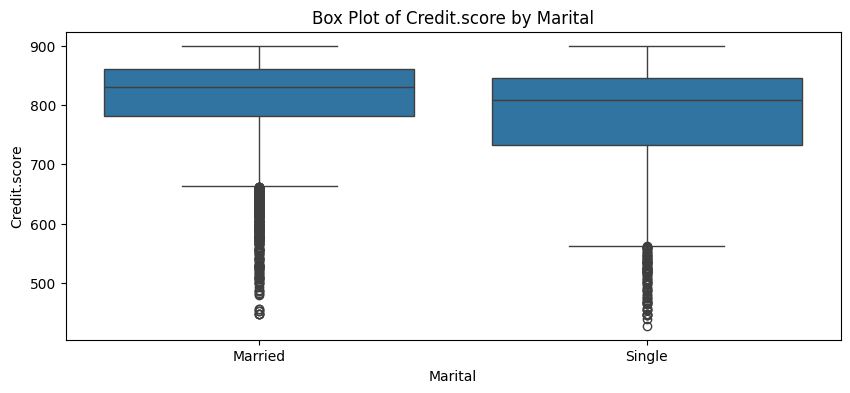

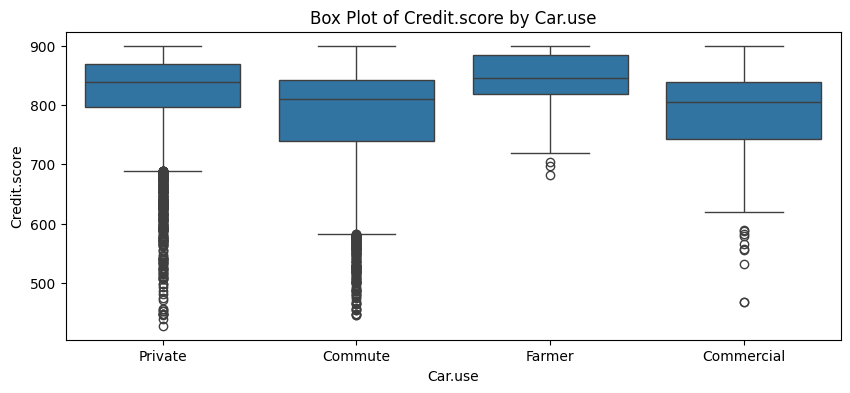

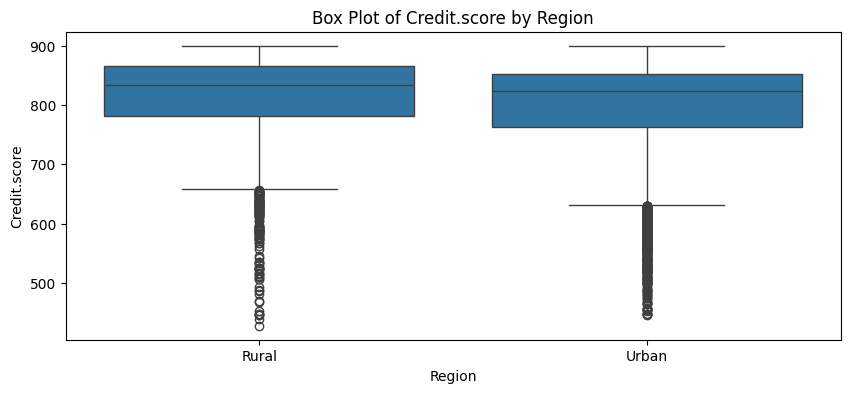

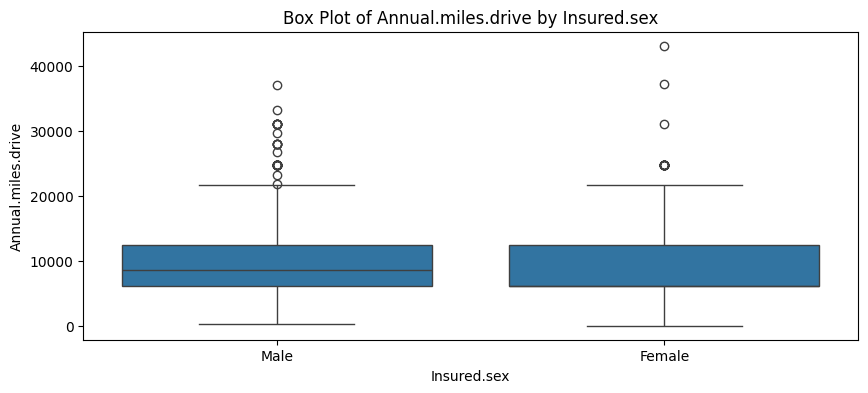

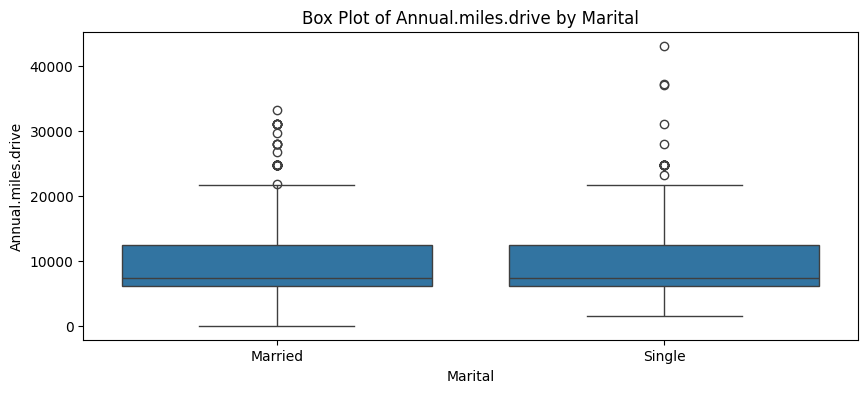

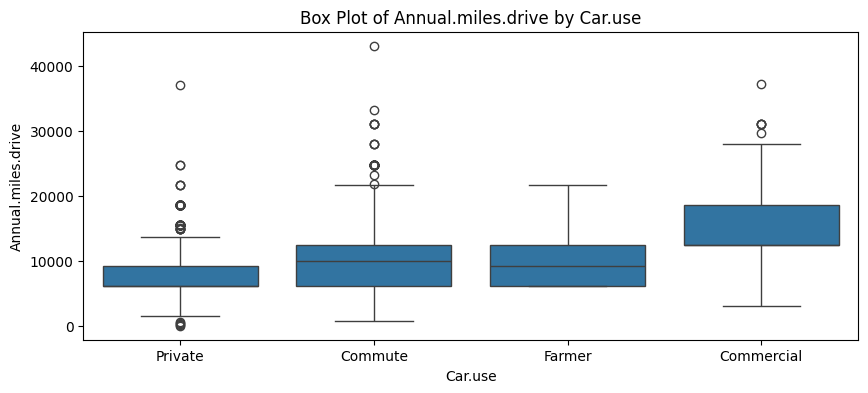

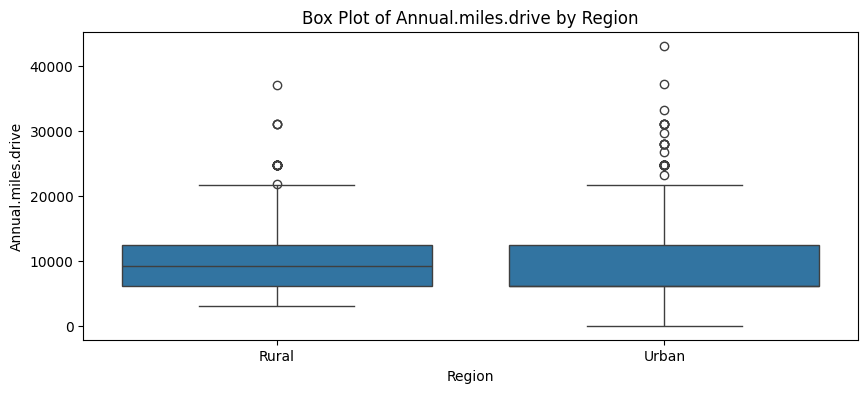

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Categorical columns
categorical_columns = ['Insured.sex', 'Marital', 'Car.use', 'Region']

# Subsample the data if necessary (e.g., 10% of the data)
sample_size = int(len(df) * 0.1)
df_sample = df.sample(n=sample_size, random_state=42)

# Plot histograms for numerical columns
for column in numerical_columns[:5]:  # Limit to first 5 numerical columns
    plt.figure(figsize=(10, 4))
    sns.histplot(df_sample[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Plot box plots for numerical columns
for column in numerical_columns[:5]:  # Limit to first 5 numerical columns
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df_sample[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

# Plot bar plots for categorical columns
for column in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=df_sample[column], order=df_sample[column].value_counts().index)
    plt.title(f'Bar Plot of {column}')
    plt.xlabel('Frequency')
    plt.ylabel(column)
    plt.show()

# Plot box plots for numerical columns grouped by categorical columns
for num_col in numerical_columns[:5]:  # Limit to first 5 numerical columns
    for cat_col in categorical_columns:
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=df_sample[cat_col], y=df_sample[num_col])
        plt.title(f'Box Plot of {num_col} by {cat_col}')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.show()



In [34]:
num_columns = df.shape[1]
print("Number of columns:", num_columns)

Number of columns: 52


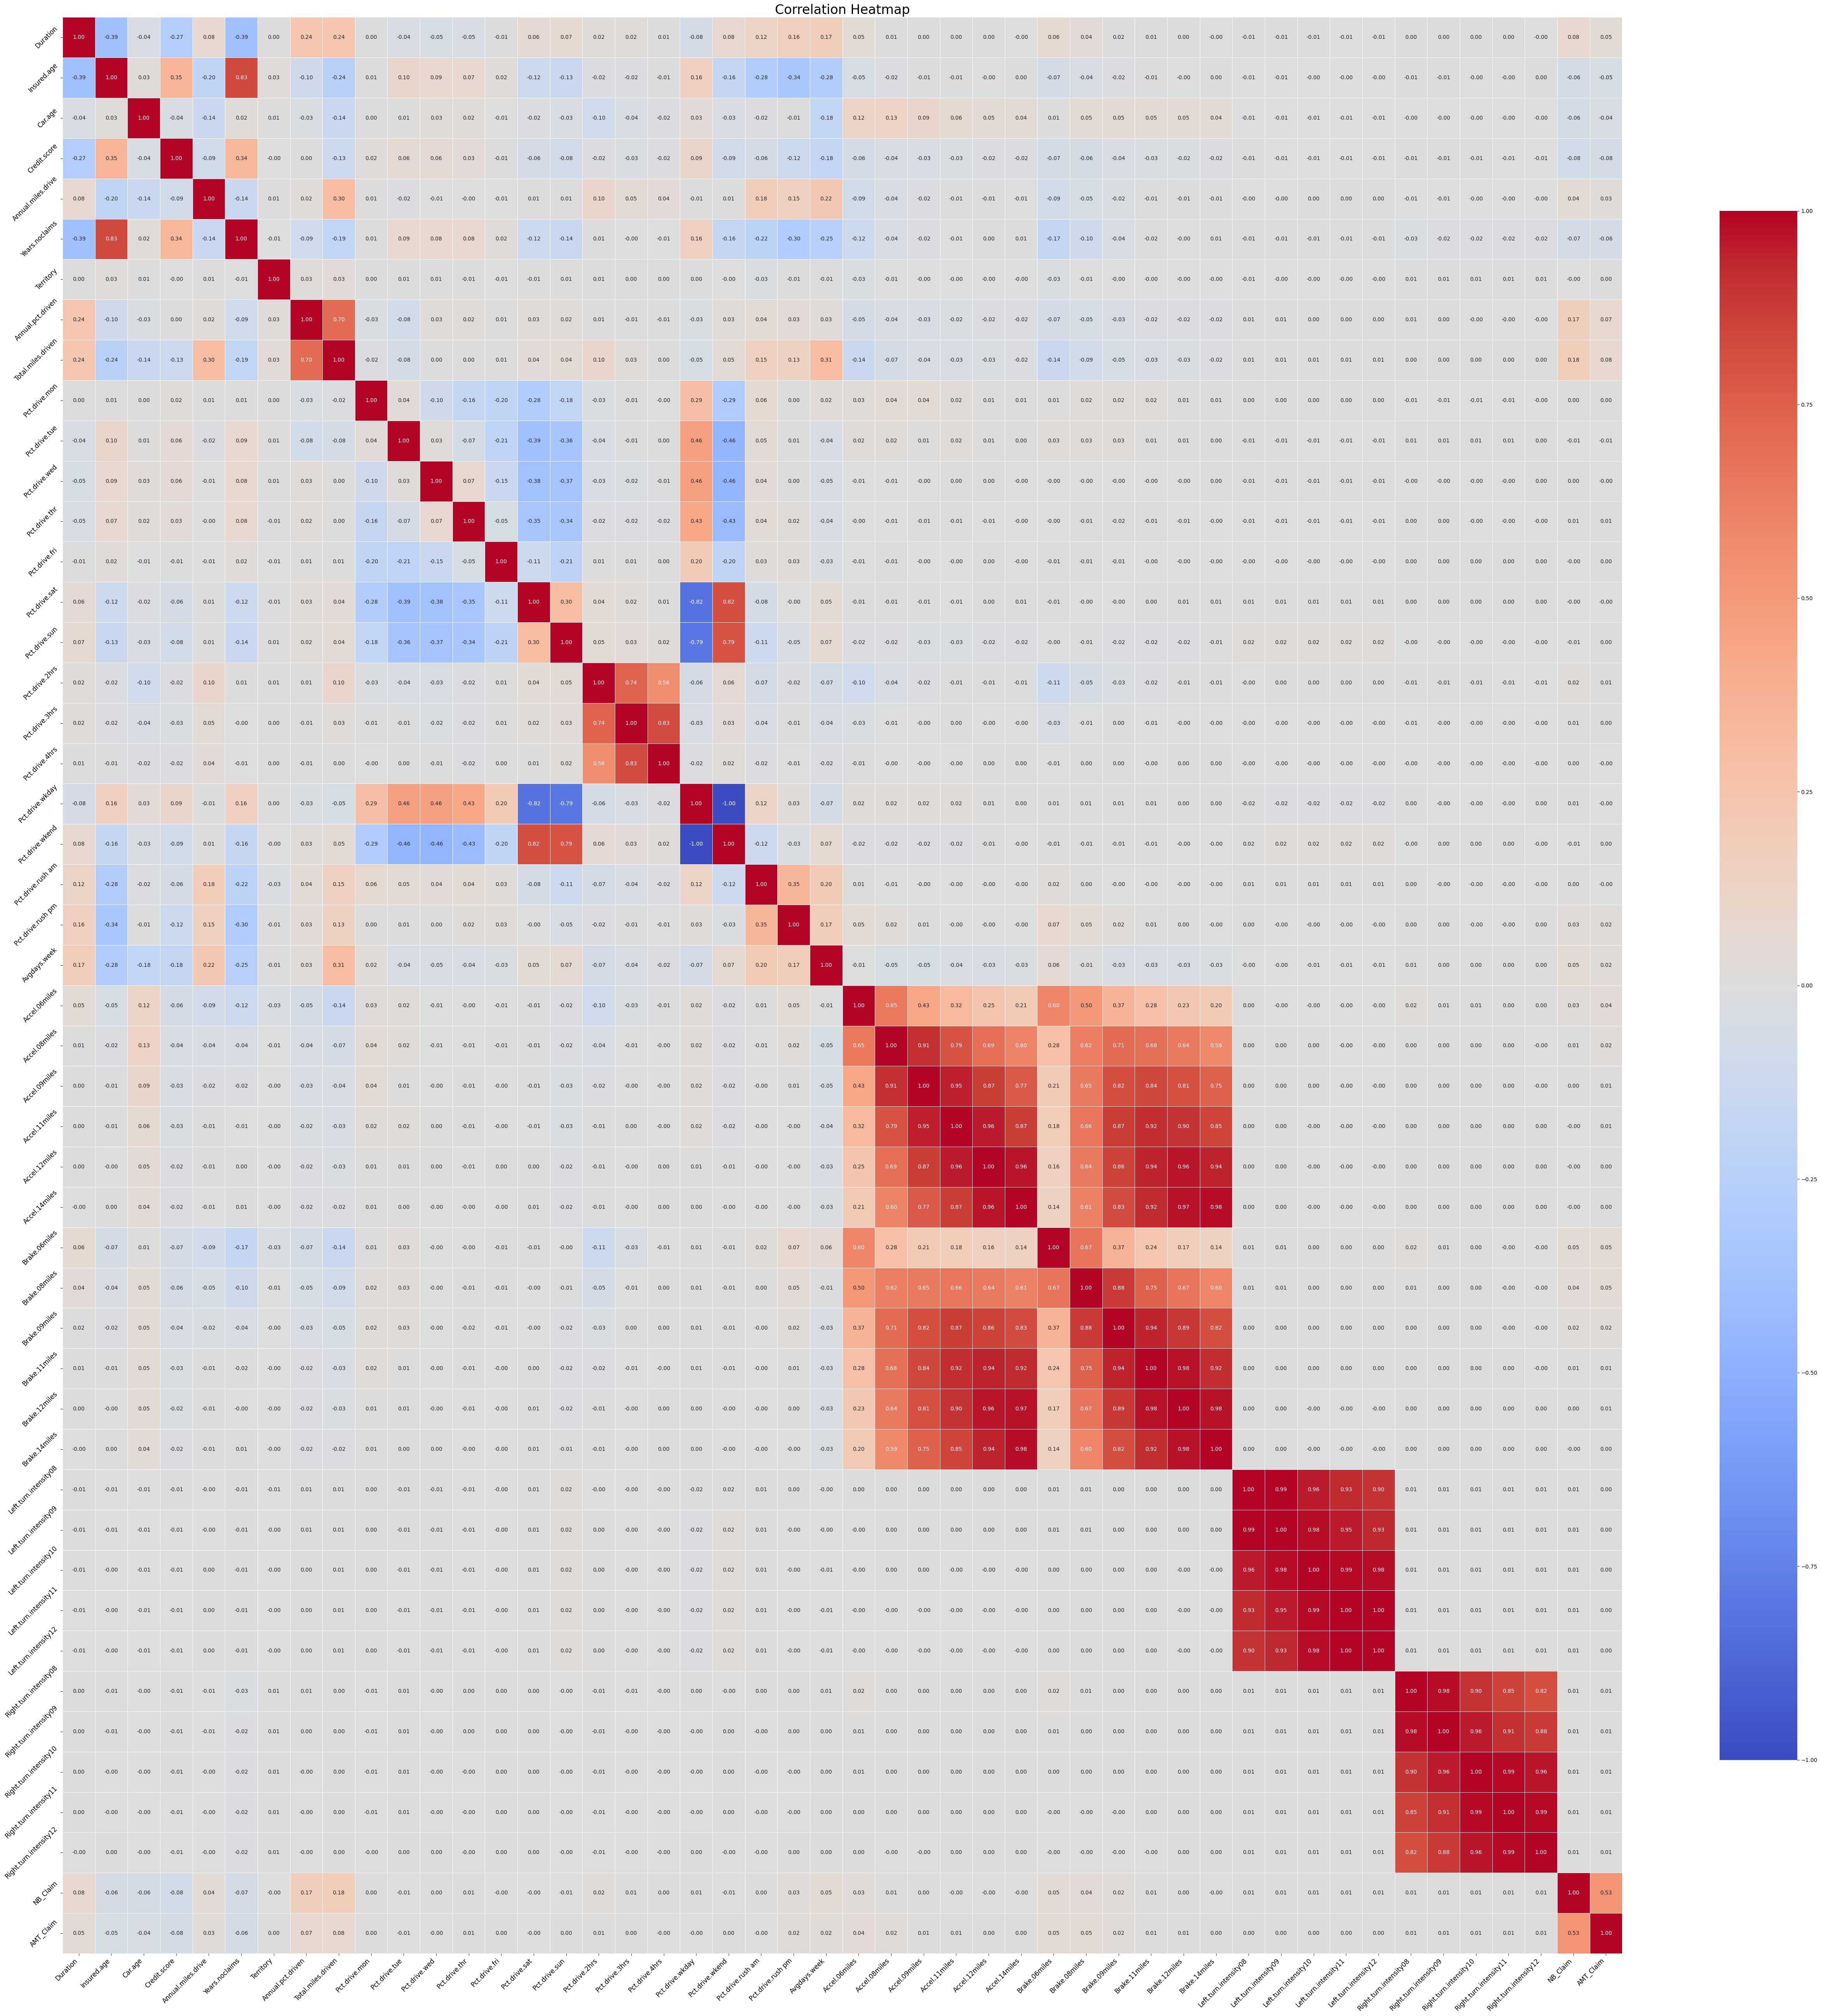

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame containing the data

# Define the column names you provided
column_names = [
    "Duration", "Insured.age", "Insured.sex", "Car.age", "Marital", "Car.use",
    "Credit.score", "Region", "Annual.miles.drive", "Years.noclaims", "Territory",
    "Annual.pct.driven", "Total.miles.driven", "Pct.drive.mon", "Pct.drive.tue",
    "Pct.drive.wed", "Pct.drive.thr", "Pct.drive.fri", "Pct.drive.sat",
    "Pct.drive.sun", "Pct.drive.2hrs", "Pct.drive.3hrs", "Pct.drive.4hrs",
    "Pct.drive.wkday", "Pct.drive.wkend", "Pct.drive.rush am", "Pct.drive.rush pm",
    "Avgdays.week", "Accel.06miles", "Accel.08miles", "Accel.09miles",
    "Accel.11miles", "Accel.12miles", "Accel.14miles", "Brake.06miles",
    "Brake.08miles", "Brake.09miles", "Brake.11miles", "Brake.12miles",
    "Brake.14miles", "Left.turn.intensity08", "Left.turn.intensity09",
    "Left.turn.intensity10", "Left.turn.intensity11", "Left.turn.intensity12",
    "Right.turn.intensity08", "Right.turn.intensity09", "Right.turn.intensity10",
    "Right.turn.intensity11", "Right.turn.intensity12", "NB_Claim", "AMT_Claim"
]

# Ensure all column names are present in the DataFrame
missing_columns = set(column_names) - set(df.columns)
if missing_columns:
    raise KeyError(f"The following columns are missing from the DataFrame: {missing_columns}")

# Remove non-numerical columns from the selection
numerical_columns = [col for col in column_names if df[col].dtype in ['int64', 'float64']]
selected_columns = df[numerical_columns]

# Compute the correlation matrix for the selected numerical columns
correlation_matrix = selected_columns.corr()

# Plot the heatmap
plt.figure(figsize=(52, 52))  # Increase the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f",
            annot_kws={"size": 10},  # Use smaller font size for annotations
            cbar_kws={"shrink": .8})  # Adjust colorbar size
plt.title('Correlation Heatmap', fontsize=24)  # Title font size
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels
plt.yticks(rotation=45, fontsize=12)  # Rotate y-axis labels
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

### Dataset Overview

The dataset used in the study is a synthetic telematics dataset modeled on real data provided by a Canadian insurer. It consists of 100,000 data samples and 52 variables divided into three categories:

1. **Traditional Data**:
   - **Car Age**: Age of the vehicle.
   - **Insured Age**: Age of the policyholder.
   - **Gender**: Gender of the policyholder.
   - **Other Features**: Includes marital status, region, territory, credit score, annual miles driven, and years without claims.

2. **Telematics Data**:
   - **Driving Behavior Metrics**: Total miles driven, harsh acceleration, harsh braking, and various metrics related to turning intensity.
   - **Driving Patterns**: Percentage of driving during different times and conditions (e.g., rush hour).

3. **Response Data**:
   - **NB_Claim**: Number of claims made by a policyholder account.
   - **AMT_Claim**: Total amount paid out from the insurance company for claims.

### Column Definitions

- **NB_Claim**: This column represents the number of claims a policyholder has made. It indicates how many times the policyholder has submitted a claim to the insurance company.

- **AMT_Claim**: This column shows the aggregated sum of claims paid out by the insurance company. It reflects the total financial liability incurred by the insurer due to claims made by the policyholder.

### Additional Information

- A new response variable, **ClaimYN**, was created to classify drivers as risky or not based on the values of **NB_Claim** and **AMT_Claim**:
  - **ClaimYN = 1**: Indicates the driver is considered a risk (more than one claim and total claims amount greater than €1,000).
  - **ClaimYN = 0**: Indicates the driver is not considered a risk.

This dataset allows for the analysis of driving behavior and its correlation with insurance claims, facilitating better risk assessment and pricing models in the insurance industry.

In [38]:
#Step 1: Create the "ClaimYN" column based on the specified conditions
df['ClaimYN'] = ((df['NB_Claim'] > 1) & (df['AMT_Claim'] > 1000)).astype(int)

# Step 2: Convert categorical columns to appropriate types
categorical_columns = ['Insured.sex', 'Marital', 'Car.use', 'Region']
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Print the modified DataFrame to verify
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 53 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   Duration                100000 non-null  int64   
 1   Insured.age             100000 non-null  int64   
 2   Insured.sex             100000 non-null  category
 3   Car.age                 100000 non-null  int64   
 4   Marital                 100000 non-null  category
 5   Car.use                 100000 non-null  category
 6   Credit.score            100000 non-null  float64 
 7   Region                  100000 non-null  category
 8   Annual.miles.drive      100000 non-null  float64 
 9   Years.noclaims          100000 non-null  int64   
 10  Territory               100000 non-null  int64   
 11  Annual.pct.driven       100000 non-null  float64 
 12  Total.miles.driven      100000 non-null  float64 
 13  Pct.drive.mon           100000 non-null  float64 
 14  Pct.d

In [42]:
# Adjust display options to show all columns
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent line wrapping

# Display the first few rows of the dataframe
print(df.tail(5))

       Duration  Insured.age Insured.sex  Car.age  Marital     Car.use  Credit.score Region  Annual.miles.drive  Years.noclaims  Territory  Annual.pct.driven  Total.miles.driven  Pct.drive.mon  Pct.drive.tue  Pct.drive.wed  Pct.drive.thr  Pct.drive.fri  Pct.drive.sat  Pct.drive.sun  Pct.drive.2hrs  Pct.drive.3hrs  Pct.drive.4hrs  Pct.drive.wkday  Pct.drive.wkend  Pct.drive.rush am  Pct.drive.rush pm  Avgdays.week  Accel.06miles  Accel.08miles  Accel.09miles  Accel.11miles  Accel.12miles  Accel.14miles  Brake.06miles  Brake.08miles  Brake.09miles  Brake.11miles  Brake.12miles  Brake.14miles  Left.turn.intensity08  Left.turn.intensity09  Left.turn.intensity10  Left.turn.intensity11  Left.turn.intensity12  Right.turn.intensity08  Right.turn.intensity09  Right.turn.intensity10  Right.turn.intensity11  Right.turn.intensity12  NB_Claim  AMT_Claim  ClaimYN
99995       182           61        Male       10   Single     Private         824.0  Urban             6213.71              42         32